# RDS HW2 solution

Install the Data Synthesizer library.

In [130]:
!pip install DataSynthesizer

In [131]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
def generate_data_A(input_data_file, output_data_size, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['A']
    
    describer = DataDescriber()
    describer.describe_dataset_in_random_mode(input_data_file, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_random_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [133]:
def generate_data_B(input_data_file, output_data_size, epsilon=0.1, seed=None):
    seed = seed or randint(0, 2**30)
    description_file = description_files['B']
    
    describer = DataDescriber()
    describer.describe_dataset_in_independent_attribute_mode(input_data_file, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_independent_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

In [134]:
def generate_data_CD(input_data_file, output_data_size, description_file, epsilon=0.5, k=1, seed=None):
    seed = seed or randint(0, 2**30)
    
    describer = DataDescriber()
    describer.describe_dataset_in_correlated_attribute_mode(input_data_file, k=k, epsilon=epsilon, seed=seed)
    describer.save_dataset_description_to_file(description_file)
    
    generator = DataGenerator()
    generator.generate_dataset_in_correlated_attribute_mode(output_data_size, description_file, seed=seed)
    return generator.synthetic_dataset

def generate_data_C(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['C'], epsilon, k=1, seed=seed)

def generate_data_D(input_data_file, output_data_size, epsilon=0.1, seed=None):
    return generate_data_CD(input_data_file, output_data_size, description_files['D'], epsilon, k=2, seed=seed)

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [135]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [136]:
fileid_compas = '1kgSIBkOM9y0nz_l8LI8ze9TAhF5gbb64'    
real_data_file = 'hw_compas.csv'

fileid_fake = '1b_T0SHQUMbVvZueZ6yXlxTKBHctMgM0k'    
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas}) 
downloaded.GetContentFile(real_data_file)  
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake}) 
downloaded.GetContentFile(fake_data_file)  
df_fake = pd.read_csv(fake_data_file)

In [137]:
output_data_size = 10000
epsilon = 0.1

seed = 0  # make the entire notebook reproducible

description_files = {'A': './descrption_A.json', 
                     'B': './descrption_B.json', 
                     'C': './descrption_C.json', 
                     'D': './descrption_D.json'}

set_random_seed(seed)

df_real_A = generate_data_A(real_data_file, output_data_size)
df_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
df_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
df_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

df_fake_A = generate_data_A(fake_data_file, output_data_size)
df_fake_B = generate_data_B(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_C = generate_data_C(fake_data_file, output_data_size, epsilon=epsilon)
df_fake_D = generate_data_D(fake_data_file, output_data_size, epsilon=epsilon)

clear_output()

## Part (a)

### Q1

Median, Mean, Min, Max of __age__ and __score__ for each A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [138]:
# Your code here
print('df_real_A[age]_MEDIAN: ', df_real_A['age'].median())
print('df_real_A[age]_MEAN: ', df_real_A['age'].mean())
print('df_real_A[age]_MIN: ', df_real_A['age'].min())
print('df_real_A[age]_MAX: ', df_real_A['age'].max())

print('df_real_B[age]_MEDIAN: ', df_real_B['age'].median())
print('df_real_B[age]_MEAN: ', df_real_B['age'].mean())
print('df_real_B[age]_MIN: ', df_real_B['age'].min())
print('df_real_B[age]_MAX: ', df_real_B['age'].max())

print('df_real_C[age]_MEDIAN: ', df_real_C['age'].median())
print('df_real_C[age]_MEAN: ', df_real_C['age'].mean())
print('df_real_C[age]_MIN: ', df_real_C['age'].min())
print('df_real_C[age]_MAX: ', df_real_C['age'].max())

print('df_real_D[age]_MEDIAN: ', df_real_D['age'].median())
print('df_real_D[age]_MEAN: ', df_real_D['age'].mean())
print('df_real_D[age]_MIN: ', df_real_D['age'].min())
print('df_real_D[age]_MAX: ', df_real_D['age'].max())

print('df_real[age]_MEDIAN: ', df_real['age'].median())
print('df_real[age]_MEAN: ', df_real['age'].mean())
print('df_real[age]_MIN: ', df_real['age'].min())
print('df_real[age]_MAX: ', df_real['age'].max())


print('df_real_A[score]_MEDIAN: ', df_real_A['score'].median())
print('df_real_A[score]_MEAN: ', df_real_A['score'].mean())
print('df_real_A[score]_MIN: ', df_real_A['score'].min())
print('df_real_A[score]_MAX: ', df_real_A['score'].max())

print('df_real_B[score]_MEDIAN: ', df_real_B['score'].median())
print('df_real_B[score]_MEAN: ', df_real_B['score'].mean())
print('df_real_B[score]_MIN: ', df_real_B['score'].min())
print('df_real_B[score]_MAX: ', df_real_B['score'].max())

print('df_real_C[score]_MEDIAN: ', df_real_C['score'].median())
print('df_real_C[score]_MEAN: ', df_real_C['score'].mean())
print('df_real_C[score]_MIN: ', df_real_C['score'].min())
print('df_real_C[score]_MAX: ', df_real_C['score'].max())

print('df_real_D[score]_MEDIAN: ', df_real_D['score'].median())
print('df_real_D[score]_MEAN: ', df_real_D['score'].mean())
print('df_real_D[score]_MIN: ', df_real_D['score'].min())
print('df_real_D[score]_MAX: ', df_real_D['score'].max())


print('df_real[score]_MEDIAN: ', df_real['score'].median())
print('df_real[score]_MEAN: ', df_real['score'].mean())
print('df_real[score]_MIN: ', df_real['score'].min())
print('df_real[score]_MAX: ', df_real['score'].max())

df_real_A[age]_MEDIAN:  51.0
df_real_A[age]_MEAN:  50.1731
df_real_A[age]_MIN:  0
df_real_A[age]_MAX:  100
df_real_B[age]_MEDIAN:  33.0
df_real_B[age]_MEAN:  35.7354
df_real_B[age]_MIN:  18.0
df_real_B[age]_MAX:  76.0
df_real_C[age]_MEDIAN:  36.0
df_real_C[age]_MEAN:  41.5788
df_real_C[age]_MIN:  18.0
df_real_C[age]_MAX:  96.0
df_real_D[age]_MEDIAN:  39.0
df_real_D[age]_MEAN:  44.1532
df_real_D[age]_MIN:  18.0
df_real_D[age]_MAX:  96.0
df_real[age]_MEDIAN:  32.0
df_real[age]_MEAN:  35.14331887386238
df_real[age]_MIN:  18
df_real[age]_MAX:  96
df_real_A[score]_MEDIAN:  5.0
df_real_A[score]_MEAN:  4.9392
df_real_A[score]_MIN:  -1
df_real_A[score]_MAX:  10
df_real_B[score]_MEDIAN:  4.0
df_real_B[score]_MEAN:  4.3657
df_real_B[score]_MIN:  1
df_real_B[score]_MAX:  10
df_real_C[score]_MEDIAN:  5.0
df_real_C[score]_MEAN:  4.9487
df_real_C[score]_MIN:  -1
df_real_C[score]_MAX:  10
df_real_D[score]_MEDIAN:  4.0
df_real_D[score]_MEAN:  4.466
df_real_D[score]_MIN:  -1
df_real_D[score]_MAX:  10
d

### Q2

Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

Text(0.5, 1.0, 'Random Mode B')

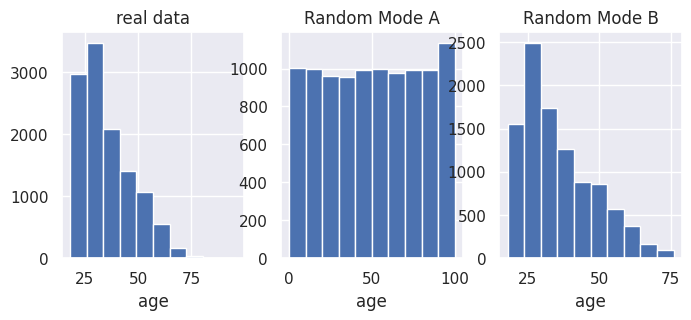

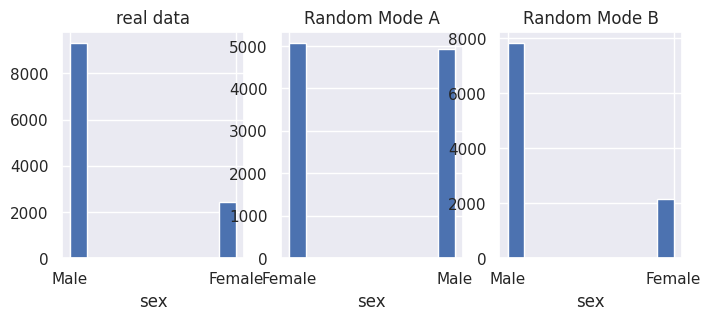

In [139]:
# Your code here

fig, axes = plt.subplots(1, 3, figsize=(8,3), dpi=100)
axes[0].hist(df_real['age'])
axes[1].hist(df_real_A['age'])
axes[2].hist(df_real_B['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[2].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('Random Mode A')
axes[2].set_title('Random Mode B')



fig, axes = plt.subplots(1, 3, figsize=(8,3), dpi=100)
axes[0].hist(df_real['sex'])
axes[1].hist(df_real_A['sex'])
axes[2].hist(df_real_B['sex'])
axes[0].set_xlabel('sex')
axes[1].set_xlabel('sex')
axes[2].set_xlabel('sex')
axes[0].set_title('real data')
axes[1].set_title('Random Mode A')
axes[2].set_title('Random Mode B')


#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [140]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [141]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [142]:
print(ks_test(df_real, df_real_A, 'age'))
print(ks_test(df_real, df_real_B, 'age'))

0.3735091775112699
0.026252445351705345


In [146]:
df_real['sex'].value_counts()
df_real.head()

,sex,age,race,score
0,Male,69,Other,1
1,Male,31,Caucasian,5
2,Male,34,African-American,3
3,Male,24,African-American,4
4,Male,23,African-American,8


In [149]:
df_real_A['sex'] = np.where(df_real_A['sex'] == 'Female', 1, 0)
df_real_B['sex'] = np.where(df_real_B['sex'] == 'Female', 1, 0)
df_real['sex'] = np.where(df_real['sex'] == 'Female', 1, 0)

In [150]:
df_real.head()

,sex,age,race,score
0,0,69,Other,1
1,0,31,Caucasian,5
2,0,34,African-American,3
3,0,24,African-American,4
4,0,23,African-American,8


In [151]:
print(kl_test(df_real, df_real_A, 'sex'))
print(kl_test(df_real, df_real_B, 'sex'))

0.2305709129013493
0.2305709129013493


### Q3

some more sophisticated statistical measure that’s good for correlated attribute mode, and will be better with k=2 (case D) than with k=1 (case C), __some distance over pairwise correlation coefficients? Also show the difference visually, comparing results on real vs. synthetic datasets__.

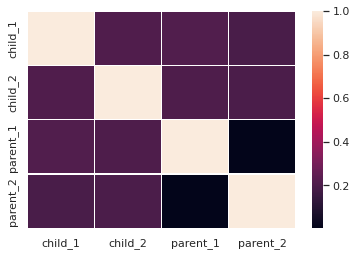

In [152]:
# Use pairwise_attributes_mutual_information function. 
# For function parameters, refer to https://github.com/DataResponsibly/DataSynthesizer/blob/master/DataSynthesizer/lib/utils.py#L31
# Your code here
pairwise_attributes_mutual_information(df_fake)

df_fake_pairwised = pairwise_attributes_mutual_information(df_fake)
sns.heatmap(df_fake_pairwised, linewidths=.5)

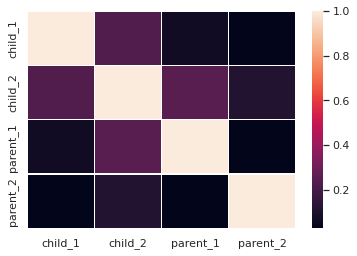

In [153]:
df_fake_C_pairwised = pairwise_attributes_mutual_information(df_fake_C)
sns.heatmap(df_fake_C_pairwised, linewidths=.5)

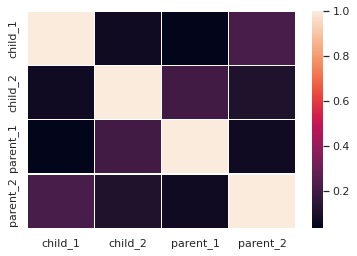

In [154]:
df_fake_D_pairwised = pairwise_attributes_mutual_information(df_fake_D)
sns.heatmap(df_fake_D_pairwised, linewidths=.5)

In [155]:
df_fake['parent_2'].value_counts()

0    351
1    341
2    308
Name: parent_2, dtype: int64

In [156]:
# Use can sns.heatmap for pairwise mutual information
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html
# Your code here

## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [160]:
# You can use sns.boxplot for the plots
# For examples, refer to https://seaborn.pydata.org/generated/seaborn.boxplot.html
# Your code here

medians_A = []
medians_B = []
medians_C = []

means_A = []
means_B = []
means_C = []

mins_A = []
mins_B = []
mins_C = []

maxes_A = []
maxes_B = []
maxes_C = []


for seed in range(0, 10):
  set_random_seed(seed)

  cur_real_A = generate_data_A(real_data_file, output_data_size)
  cur_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
  cur_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)

  medians_A.append(cur_real_A['age'].median())
  medians_B.append(cur_real_B['age'].median())
  medians_C.append(cur_real_C['age'].median())

  means_A.append(cur_real_A['age'].mean())
  means_B.append(cur_real_B['age'].mean())
  means_C.append(cur_real_C['age'].mean())

  mins_A.append(cur_real_A['age'].min())
  mins_B.append(cur_real_B['age'].min())
  mins_C.append(cur_real_C['age'].min())

  maxes_A.append(cur_real_A['age'].max())
  maxes_B.append(cur_real_B['age'].max())
  maxes_C.append(cur_real_C['age'].max())


================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute race
Adding attribute sex
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute race
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute sex
Adding attribute race
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute score
Adding attr

In [161]:
# for boxplots
def plot_boxplots(metrics_A, metrics_B, metrics_C, metric_name):
  plt.boxplot([metrics_A, metrics_B, metrics_C], labels=['A', 'B', 'C'])

  plt.ylabel(metric_name)
  plt.legend()
  plt.show()

# for boxplots
def plot_init_v_tuned_box(init_metrics, tuned_metrics, metric_name):
  '''Creates a bar graph comparing init_metrics to tuned_metrics'''

  # Make some x values
  x_init = list(range(len(init_metrics)))
  x_tuned = [x + 0.35 for x in x_init]

  # Plot the metrics
  plt.boxplot([init_metrics, tuned_metrics], labels=['Initial Model', 'Tuned Model'])

  # Create labels, etc. 
  plt.ylabel(metric_name)
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


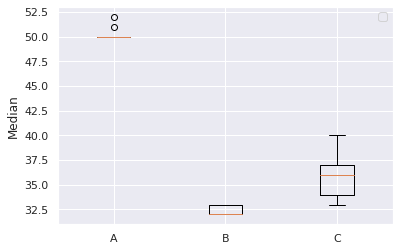

In [162]:
plot_boxplots(medians_A, medians_B, medians_C, 'Median')

No handles with labels found to put in legend.


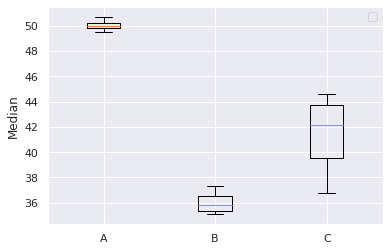

In [163]:
plot_boxplots(means_A, means_B, means_C, 'Median')

No handles with labels found to put in legend.


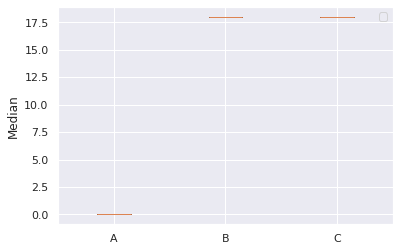

In [164]:
plot_boxplots(mins_A, mins_B, mins_C, 'Median')

No handles with labels found to put in legend.


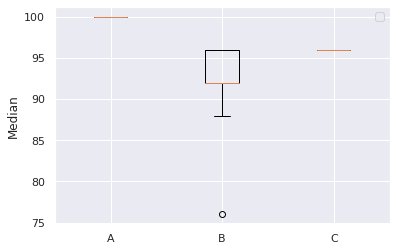

In [165]:
plot_boxplots(maxes_A, maxes_B, maxes_C, 'Median')

## Part (c)

Study how accuracy of Q3 changes for case **C**, as you vary __epsilon__ = [0.01, 0.02, ..., 0.1].

In [166]:
# Your code here
epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for seed in range(0, 10):
  set_random_seed(seed)

  for epsilon in epsilons:
    cur_real_B = generate_data_B(real_data_file, output_data_size, epsilon=epsilon)
    cur_real_C = generate_data_C(real_data_file, output_data_size, epsilon=epsilon)
    cur_real_D = generate_data_D(real_data_file, output_data_size, epsilon=epsilon)

    kl_test(df_real, cur_real_B, 'race')
    kl_test(df_real, cur_real_C, 'race')
    kl_test(df_real, cur_real_D, 'race')





  

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute age
Adding attribute race
Adding attribute score
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute age
Adding attribute sex
Adding attribute score
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute age
Adding attribute race
Adding attribute score
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute sex
Adding attribute score
Adding attribute age
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT race
Adding attribute age
Adding attrib

## Part (d)

Create and inspect differentially privаte spanning tree. There is no need to write your own code for this part, but what you write in the report should demonstrate a nuanced understanding of how the structures differ between the two approaches (DataSynthesizer and MST).

In [ ]:
# Run and then ignore this cell, installing MST
!git clone https://github.com/ryan112358/private-pgm.git
%cd private-pgm
! pip install -r requirements.txt
! python setup.py install
import os, sys
sys.path.append(os.getcwd())
!git clone https://github.com/lurosenb/host_mst_wrapper
sys.path.insert(1, "/content/private-pgm/src")
from host_mst_wrapper.mst.mst import MSTSynthesizer

In [ ]:
# Here we have to convert all the data from hw_compas to categorical numerical,
# so that MST can process it.
df_real['sex'] = df_real['sex'].astype('category')
df_real['race'] = df_real['race'].astype('category')
df_real['score'] = df_real['score'].astype('category')
categorical = df_real.select_dtypes(['category']).columns
df_real[categorical] = df_real[categorical].apply(lambda x: x.cat.codes)

In [ ]:
synth = MSTSynthesizer(epsilon=0.1, domain_path="host_mst_wrapper/mst/compas-domain.json")
synth.fit(df_real)
synth.display_MST_graph()

## Part (e)
### 1. KL Divergence for MST
Study how KL Divergence compares on hw_compas for MST compared to dataset **D** (df_real_D), as you vary __epsilon__ = [0.1, 0.2, ..., 1]. You only need to do this for **5 datasets** per epsilon this time (i.e., run 5 iterations per epsilon). Expect each MST run to take ~15-20 seconds.

You can fit the MST synthesizer using the same code as above for visualizing. Once fit, you can produce a synthetic dataset by simply using the following method:

`mst_fake_data = synth.sample(samples=10000)`

After running this command, `mst_fake_data` will be a pandas dataframe with 10000 rows and with the same columns as whatever dataframe MST was fit on! 

In [ ]:
epsilons_mst_kl = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
iters = 5
# Your code here

### 2. Mutual Information Plot for MST
Again, replicate your plots from Part (c) for MST, this time for mutual information, on both hw_compas and hw_fake (df_real and df_fake), varying epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. Compare this plot to the plot of dataset **D** (df_real_D). Once again, you need only generate **5 datasets** per epsilon (i.e., run 5 iterations per epsilon).

In [ ]:
epsilons_mst_mi = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
iters = 5
# Your code here